# Importing the Dependencies




In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Data Collection & Processing

In [3]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [5]:
# loading the data to a data frame
data = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
data['label'] = breast_cancer_dataset.target

In [7]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# checking the distribution of Target Varibale
data['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [12]:
X = data.drop(columns='label', axis=1)
Y = data['label']

In [14]:
#Splitting the data into training data & Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
#Standardize the data
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Building the Neural Network


In [22]:
# setting up the layers of Neural Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [23]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.6112 - val_loss: 0.5059 - val_accuracy: 0.7826
Epoch 2/20
13/13 [==============================] - 0s 951us/step - loss: 0.4524 - accuracy: 0.8557 - val_loss: 0.3632 - val_accuracy: 0.9348
Epoch 3/20
13/13 [==============================] - 0s 949us/step - loss: 0.3259 - accuracy: 0.9218 - val_loss: 0.2750 - val_accuracy: 0.9348
Epoch 4/20
13/13 [==============================] - 0s 994us/step - loss: 0.2436 - accuracy: 0.9340 - val_loss: 0.2130 - val_accuracy: 0.9348
Epoch 5/20
13/13 [==============================] - 0s 1ms/step - loss: 0.1902 - accuracy: 0.9438 - val_loss: 0.1759 - val_accuracy: 0.9348
Epoch 6/20
13/13 [==============================] - 0s 1ms/step - loss: 0.1563 - accuracy: 0.9584 - val_loss: 0.1478 - val_accuracy: 0.9130
Epoch 7/20
13/13 [==============================] - 0s 1ms/step - loss: 0.1327 - accuracy: 0.9658 - val_loss: 0.1300 - val_accuracy: 0.9348
Epoch 8/20
13/

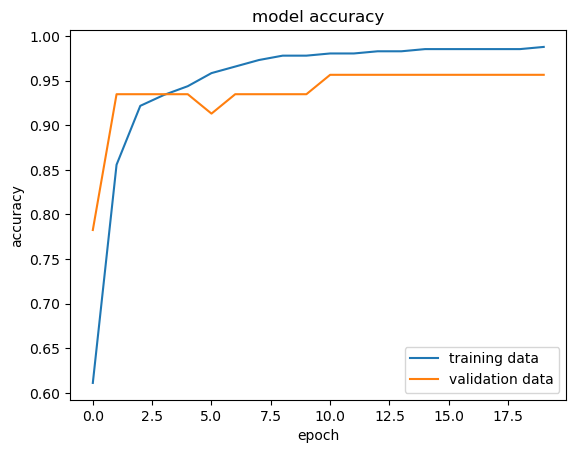

In [25]:
# Visualizing accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

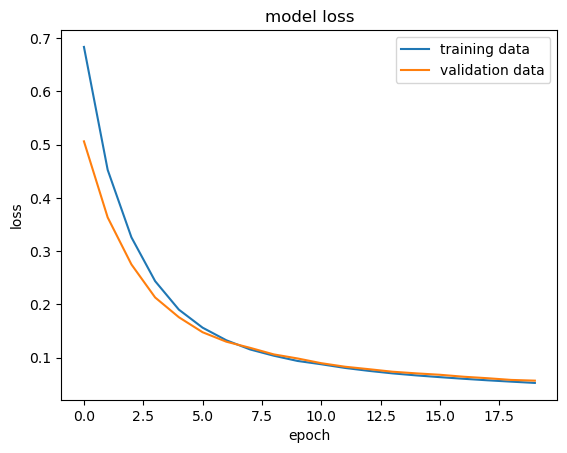

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [27]:
# Accuracy of the model on test data
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 857us/step - loss: 0.0889 - accuracy: 0.9649
0.9649122953414917


In [28]:
Y_pred = model.predict(X_test_std)
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels[3])

4/4 [==============================] - 0s 659us/step
0


# Building the predictive system


In [29]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 7ms/step
[[0.03923906 0.94861573]]
[1]
The tumor is Benign


/Users/alifallaha/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
